# PMT GEM Istogramma di Carica di Singolo Fotoelettrone

In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [31]:
fileROOT = root.TFile('../../../Data/SinglePhoto/singlePhoto5mV.root')#"chargeDataBlu.root") #nome del rootfile
tree = fileROOT.Get("t1") #nome del datatree

nDat = 1024*4 #numero dati per evento
nEvts = tree.GetEntries() #numero di eventi
n = 1024
#creo due array vuoti per salvare wave_array e time_array del .root

wave = np.zeros((nEvts,nDat))
time = np.zeros((nEvts,nDat))

#eseguo un ciclo sul tree e salvo i dati dentro gli array come ulteriori array...
#quindi adesso avrò array 2d in cui il primo indice si riferisce all'evento e il secondo al dato 
#contenuto dentro quell'evento
i=0
for dat in tree:
    wave[i] = np.array(dat.wave_array)
    time[i] = np.array(dat.time_array)
    i = i+1


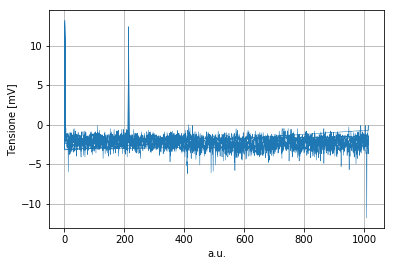

In [32]:
plt.plot(time[7] , wave[7] , linewidth = .5)#stampo il 7mo evento
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

In [33]:
wave.shape

(10000, 4096)

In [34]:
waveCh1 = np.zeros((nEvts,n))
waveCh2 = np.zeros((nEvts,n))
waveCh3 = np.zeros((nEvts,n))
waveCh4 = np.zeros((nEvts,n))

timeCh1 = np.zeros((nEvts,n))
timeCh2 = np.zeros((nEvts,n))
timeCh3 = np.zeros((nEvts,n))
timeCh4 = np.zeros((nEvts,n))


print(waveCh1.shape , nDat/4)

for i in range(nEvts):
    for j in range(nDat):
        if j < nDat/4:
            waveCh1[i][j] = wave[i][j]
            timeCh1[i][j] = time[i][j]
        elif j >= nDat/4 and j < nDat/2:
            waveCh2[i][j-n] = wave[i][j]
            timeCh2[i][j-n] = time[i][j]
        elif j >= nDat/2 and j < nDat*3/4:
            waveCh3[i][j-2*n] = wave[i][j]
            timeCh3[i][j-2*n] = time[i][j]
        elif j >= nDat*3/4: 
            waveCh4[i][j-3*n] = wave[i][j]
            timeCh4[i][j-3*n] = time[i][j]


((10000, 1024), 1024)


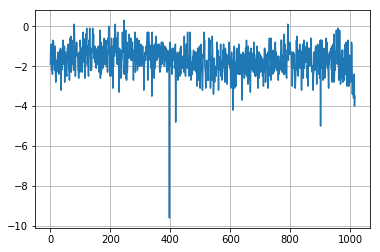

(88, 1, 0.9928385615348816)
(253, 1, 0.9928385615348816)
(292, 1, 0.9928385615348816)
(393, 1, 0.9928385615348816)
(518, 1, 0.9928385615348816)
(885, 1, 0.9928385615348816)
(900, 1, 0.9928385615348816)
(1150, 1, 0.9928385615348816)
(1181, 1, 0.9928385615348816)
(1533, 1, 0.9928385615348816)
(1613, 1, 0.9928385615348816)
(1716, 1, 0.9928385615348816)
(1784, 1, 0.9928385615348816)
(2101, 1, 0.9928385615348816)
(2205, 1, 0.9928385615348816)
(2501, 1, 0.9928385615348816)
(2692, 1, 0.9928385615348816)
(2955, 1, 0.9928385615348816)
(2964, 1, 0.9928385615348816)
(3081, 1, 0.9928385615348816)
(3475, 1, 0.9928385615348816)
(3515, 1, 0.9928385615348816)
(3978, 1, 0.9928385615348816)
(4519, 1, 0.9928385615348816)
(4609, 1, 0.9928385615348816)
(4614, 1, 0.9928385615348816)
(4809, 1, 0.9928385615348816)
(4840, 1, 0.9928385615348816)
(4967, 1, 0.9928385615348816)
(5119, 1, 0.9928385615348816)
(5376, 1, 0.9928385615348816)
(5847, 1, 0.9928385615348816)
(6369, 1, 0.9928385615348816)
(6403, 1, 0.992838

In [35]:
plt.plot(timeCh4[156] , waveCh4[156])#alcuni eventi vanno scartati (sono elencati dal programma quali)
plt.grid()
#plt.xlim(0,3)
plt.show()
j= 0
for i in range(nEvts):
    if min(waveCh4[i]) < -110 and waveCh4[i].argmin() < 5: 
        print(i , waveCh4[i].argmin() , timeCh4[i][waveCh4[i].argmin()])
        j = j+1
print(j , 8)
#waveCh4[70][:].argmin()
#print(waveCh4[70][1] , waveCh4[151][1])

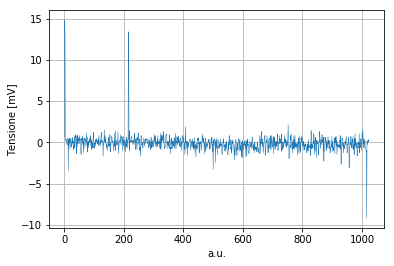

In [36]:
#creo un array per salvare i valori medi di tensione di piedistallo
meanPedestal = np.zeros((nEvts,1))

#scorro i dati e per ciascun evento seleziono una zona pre-segnale di cui faccio la media
#riscrivo quindi i dati scalandoli della media di piedistallo
for i in range(nEvts):
    waveCh4[i] = waveCh4[i]-np.mean(waveCh4[i][100:200])
    
#stampo la forma d'onda riscalata
plt.plot(waveCh4[7] , linewidth = 0.5)
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

9926


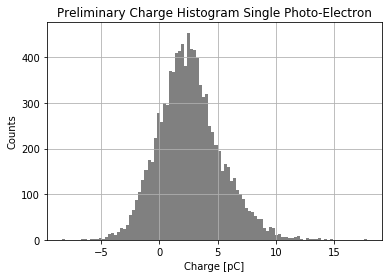

In [42]:

waveCh4A = np.zeros((nEvts-8,n))
R = 50 #resistenza in Ohm

j=0
for i in np.arange(1,nEvts):
    #butto gli eventi con il picco strano
    if min(waveCh4[i]) >= -110 or (min(waveCh4[i])< -110  and waveCh4[i].argmin() != 1):
        #seleziono solo gli eventi che hanno picchi sotto i 50mV (è una prova)
        if min(waveCh4[i]) >= -20:
            waveCh4A[j] = waveCh4[i]/R #conversione dati Tensione -> dati Corrente
            j = j+1
    else: 1 
        #print(min(waveCh4[i]) , waveCh4[i].argmin() , i) #check
        
        
print(j+1)#check
integral = np.zeros(j)
#Eseguo l'Integrale
for i in range(j):
    integral[i] = sum(-waveCh4A[i])

#Istogramma di Carica    
plt.title('Preliminary Charge Histogram Single Photo-Electron')
plt.ylabel('Counts')
plt.xlabel('Charge [pC]')
plt.hist(integral , bins=100 , color = 'grey')
plt.grid()
#plt.xticks(np.arange(min(integral),max(integral)+1, 5))
#plt.savefig('../Grafici/chargeHistSinglePhoto.png')
plt.show()

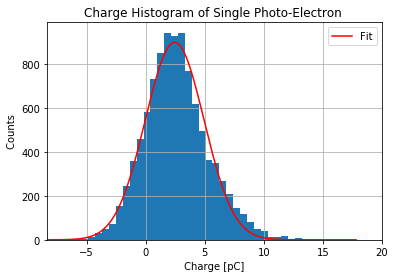

('media = 2.44721507602', 2.614501326993628)
 FCN=151.831 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=7.09728e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.98959e+02   1.16496e+01   5.55353e-02  -6.48587e-06
   2  Mean         2.44722e+00   2.80794e-02   1.57702e-04  -3.26815e-03
   3  Sigma        2.49014e+00   2.10041e-02   1.28054e-05   1.53345e-02


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


In [40]:
from ROOT import TMath , TF1, TH1F
import scipy.stats as st 


xmin = min(integral)
    
h1 = TH1F( "h1", "Charge Histogram of Single Photo-Electron ; Charge [pC] ; Counts ", 100, xmin, 50 )
for i in integral:
        h1.Fill(i)
xmax = h1.GetBinCenter(h1.GetMaximumBin())#max(integral)#  #è la x del max dell'istogramma
   
l = np.linspace(xmin , max(integral) , len(integral))
func = TF1("fitF" , "gaus" , xmin , xmax+7)
#func.SetParLimits(1 , xmax-1 , xmax+1) 
#func.SetParLimits(0 , h1.GetMaximum() , h1.GetMaximum())

h1.Fit("fitF" , "R")

#uso la normale definita in scipy usando i parametri estratti dal fit
pdf = st.norm.pdf(l , func.GetParameter(1) , func.GetParameter(2)) 
from rootplot import root2matplotlib as r2m

histo1 = r2m.Hist(h1) #permette di leggere l'istogramma già riempito da root
histo1.hist()#histtype = 'step' , fill = False) #fa l'istogramma
plt.plot(l , pdf*func.GetParameter(0)/max(pdf) , label = 'Fit' , color = 'r') 
plt.grid()
plt.xlim((xmin,20))
plt.legend()
histo1.show_titles()
#plt.xlabel('Charge [pC]')
#plt.ylabel('Counts')
#plt.title(')
#plt.savefig('../Grafici/FitSinglePhoto.png')
plt.show()


print('media = ' + str(func.GetParameter(1)) , np.mean(integral))